In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [2]:
### using yolo v5

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 as cv
from warnings import filterwarnings as filt 
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader


filt('ignore')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 6)

In [41]:
path = '/content/drive/MyDrive/face_detection'
dataset_base_path = "datasets/open-images-v6"
os.chdir(path)

!pwd

/content/drive/MyDrive/face_detection


In [42]:
def add_classes_to_subsets(base_path, filename, content):
  for subset in ['train', 'validation', 'test']:
    dirname = os.path.join(base_path, subset, 'labels')
    print(f'writing to {dirname} ...')
    with open(os.path.join(dirname, filename), 'w') as file:
      file.write(content)

In [43]:
base_path = 'datasets/open-images-v6'
filename  = 'classes.txt'
content = '''
person
human_face
'''

In [44]:
### changing the model config file

import json
import pprint
import yaml as yml

config = f'''
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]

path: {os.path.join('..', dataset_base_path)}  
train: {os.path.join('train', 'images')} 
val: {os.path.join('validation', 'images')}  

# Classes
nc: 2  # number of classes
names: [ 'person', 'human_face']  # class names
'''

filename = 'dataset.yml'

with open(os.path.join('yolov5', filename), 'w') as file:
  file.write(config)

pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(yml.safe_load(open(os.path.join('yolov5', filename), 'r')))

{   'names': ['person', 'human_face'],
    'nc': 2,
    'path': '../datasets/open-images-v6',
    'train': 'train/images',
    'val': 'validation/images'}


In [6]:
train_path  = os.path.join('yolov5', 'train.py')
EPOCH       = 1
BATCH       = 4
IMG_SIZE    = 640
weight_path = os.path.join('pt_weights', 'yolov5l.pt')
data_path   = os.path.join('yolov5', 'dataset.yml')

!python {train_path} --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCH} --data {data_path} --weights {weight_path}

train: weights=pt_weights/yolov5l.pt, cfg=, data=yolov5/dataset.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-132-g014acde torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.

In [3]:
def get_best_exp_weights(best = True):
  pt_base_path = os.path.join('yolov5', 'runs', 'train')
  exps = []
  for exp in os.listdir(pt_base_path):
    if 'exp' in exp:
      exps.append(exp)
  
  wpt = os.path.join(pt_base_path, exps[-1], 'weights')
  pt = os.path.join(wpt, 'best.pt' if best else 'last.pt') 
  return pt

In [5]:
get_best_exp_weights(False)

'yolov5/runs/train/exp6/weights/last.pt'

In [6]:
### load model 
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path = get_best_exp_weights(), force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-4-17 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 367 layers, 46113663 parameters, 0 gradients, 107.8 GFLOPs
Adding AutoShape... 


In [8]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [10]:
res = model(img)

In [39]:
res.print()

image 1/1: 720x1280 13 human_faces
Speed: 257.9ms pre-process, 116.5ms inference, 1.9ms NMS per image at shape (1, 3, 384, 640)


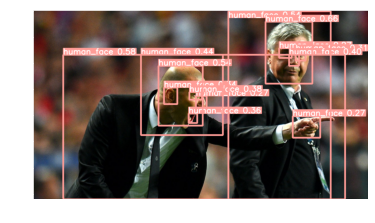

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(res.render()))
plt.show()

In [15]:
res.render()[0].shape

(720, 1280, 3)

In [19]:
def show_class_labels(subset = 'train'):
  path = f'datasets/open-images-v6/{subset}/labels/classes.txt'
  with open(path, 'w') as file:
    f = file.read()

  return f

In [34]:
def show_imgs(path):
  plt.figure(figsize = (15, 10))
  plt.imshow(plt.imread(path));
  plt.axis(False)
  plt.show()

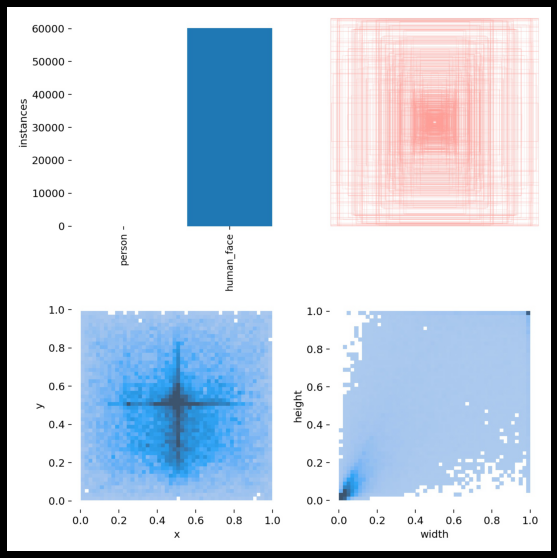

In [35]:
exp = 'exp6'
path = f'yolov5/runs/train/{exp}/labels.jpg'
show_imgs(path)

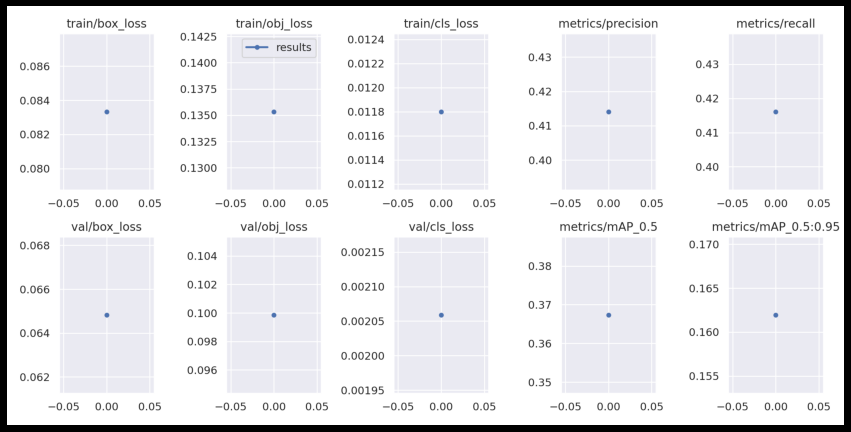

In [37]:
path = f'yolov5/runs/train/{exp}/results.png'
show_imgs(path)

In [1]:
!sftp

usage: sftp [-46aCfpqrv] [-B buffer_size] [-b batchfile] [-c cipher]
          [-D sftp_server_path] [-F ssh_config] [-i identity_file] [-l limit]
          [-o ssh_option] [-P port] [-R num_requests] [-S program]
          [-s subsystem | sftp_server] host
       sftp [user@]host[:file ...]
       sftp [user@]host[:dir[/]]
       sftp -b batchfile [user@]host
